   #                                  FACTORS AFFECTING THE RATE OF CO2 
#                    EMISSIONS FROM VEHICLES OF DIFFERENT ENGINE TYPES

### PROBLEM STATEMENT

Which factor or factors show significant effect on the rate of carbon dioxide emissions from vehicles with various engine sizes?

## BACKGROUND RESEARCH 
Studies show that the major sources of carbon dioxide emissions in the United States are electricity and transportation (see Figure 1). In 2012, about 38% of the total U.S. carbon dioxide emissions came from the combustion of fossil fuels, specifically coal, to generate electricity; this is the largest source of carbon dioxide emissions in the nation. The second largest source of carbon dioxide gas comes from transportation through the combustion of fossil fuels like gasoline and diesel. This accounts for about 32% of the total emissions.
Between the years 1990 to 2012 (see Figure 2 on the next page), carbon dioxide emissions in the United States increased by about 5%. Several factors have been studied to be the sources of this increase. Some of these sources are increased population and economic growth, fluctuating energy prices, development of new technologies, and changing seasonal temperatures. Emissions from transportation contributed to about a 5% increase as well. It has been noted that as the level of carbon dioxide in the atmosphere increases, the greenhouse effect has also increased. This means that the dominant factor of the warming of the Earth is the increased emission of carbon dioxide in the atmosphere.



## Importing Needed packages

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Importing CSV File

In [27]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-06-29 07:24:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2019-06-29 07:24:01 (475 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Reading the data

In [28]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [29]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [31]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


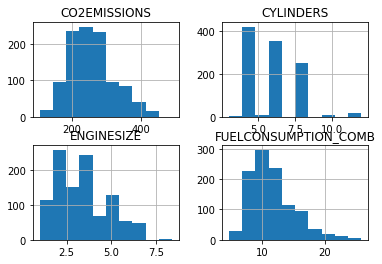

In [32]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

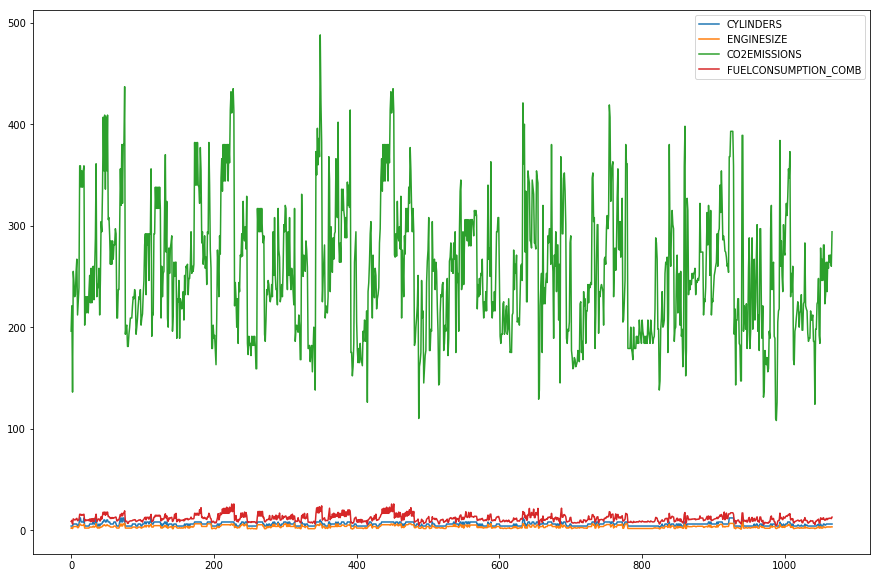

In [33]:
viz.plot(kind = 'Line', figsize= (15,10))
plt.show()

## Creating train and test dataset

In [34]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

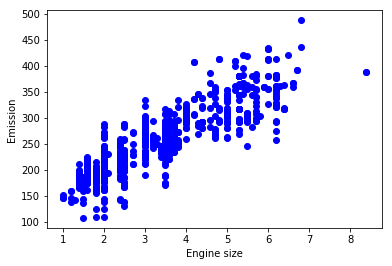

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 38.29385643]]
Intercept:  [ 127.24431562]


Text(0,0.5,'Emission')

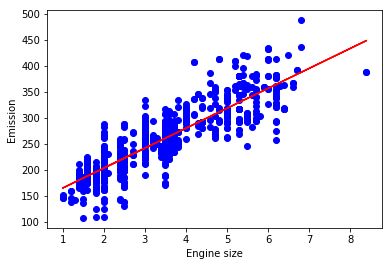

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [38]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.58
Residual sum of squares (MSE): 894.22
R2-score: 0.67


In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ',  regr.coef_)

Coefficients:  [[ 10.90069583   6.8739398    9.82511641]]


In [40]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 542.81
Variance score: 0.87


## RESULTS
Three different factors were studied and tested in our model. These were the ticks per cycle to switch the traffic lights from green to red and vice versa, number of cars to produce greater or less traffic congestion, and speed limit set to .25mph, .35mph, .45mph, and .65mph under two conditions, no traffic lights and with traffic lights. 
During the first trial, we measured the carbon dioxide emissions of each of the four vehicles with different engine sizes (4-cylinder, v-6, v-8, and diesel engine) as they ran a constant distance of 10 miles or 16 kilometers with varying speed limit without traffic lights. We set the values of the ticks per cycle to 25 and 50, and set the number of crossings or intersections to 2. We did the same tests and same conditions with 50 and 75 cars to see how traffic congestion could affect the rate of carbon dioxide emissions of each vehicle being tested. 
Without traffic, we compared the rates of carbon dioxide emission rate with less traffic (only four vehicles) and with more traffic (by the addition of more cars on the grid), and having the ticks per cycle set at twenty-five at first them at fifty. We observed a dramatic increase of carbon dioxide emissions from all four vehicles. Nearly every vehicle increased its CO2 emissions by six hundred to a thousand grams. With traffic lights and the speed limit set at .25, the amount of carbon dioxide gas was increased by about nine hundred for the eight-cylinder, about one thousand five hundred for the diesel, about nine hundred for the six-cylinder, and about six-hundred for the four-cylinder. The final run of the model showed a decrease of emissions as the speed limit was increased by 0.10. Each vehicle showed a significant decrease of its CO2 emissions when speed limit value was increased - nine hundred for the eight-cylinder, one thousand five hundred for the diesel, nine hundred for the six-cylinder, and six hundred for the four-cylinder. This tells us that CO2 emissions and speed limit show an inverse relationship – the faster the vehicles run, the less CO2 gas would be emitted. 
With traffic lights, the carbon dioxide emissions from the four vehicles increased dramatically, about 400 to 500 grams, compared to running with no traffic lights. The increase of the speed limit value still exhibited a decrease in the amount of CO2 emissions but in comparison to having no traffic lights when the vehicles ran, the amount of the emissions was still higher.


## CONCLUSION 
According to research, transportation accounts for about 32% of the total carbon dioxide emissions in the United States. The combustion of gasoline in many vehicles increases the amount of carbon dioxide gas in the atmosphere. We have identified three factors that significantly increase the rate of CO2 emissions from vehicles of differing engine sizes (4-cylinder, V-6, V-8, and diesel). These identified factors are speed limit, traffic lights, and traffic congestion. The results showed us that there is an inverse relationship between speed limit and carbon dioxide emissions. As the speed limit increases the rate of CO2 emissions decreases within two conditions (with and without traffic lights). On the other hand, there is a direct relationship between traffic congestion and carbon dioxide emissions. Having more cars on the grid creates increased traffic congestion which also increases the rate of CO2 emissions from all four vehicles. Also, the addition of traffic lights significantly increases the rate of CO2 emissions which tells us that these two variables are directly related. 
After several tests and observations, we have finally made a conclusion that all three factors (speed limit, traffic lights, and traffic congestion) significantly affect the rate of CO2 emissions from all four vehicles. Since the situations shown in our simulation cannot be avoided within the city limit, our team suggests for vehicle drivers to avoid (if possible) driving on roads with more traffic or with traffic lights to reduce the emissions of CO2 gas. The best solution for everyone to try doing is to purchase hybrid cars if one can afford to do so or buy a car with smaller engine size. 
